# MAI Assignment Part 02 "Conceptual and Programming based Questions"
## Submitted by: Lubaba         Roll #: CS-101/2021

In [2]:
%matplotlib inline
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

# Part 02 question 02


<b>Defining array<b>

In [4]:
A=np.array([[1,0.9],[0.9,1]])
A


array([[1. , 0.9],
       [0.9, 1. ]])

<b>a) Computing eigen values and eigen vectors<b>

In [7]:
# finding eigenvalues and eigenvectors
eig_val, eig_vec = np.linalg.eig(A)

print(eig_val)
print(eig_vec)

[1.9 0.1]
[[ 0.70710678 -0.70710678]
 [ 0.70710678  0.70710678]]


<b>b) Proof: sum of eigen values = trace of matrix <b>

In [14]:
# Show that sum of eigen values = trace of matrix
a = eig_val[0] + eig_val[1]
a = round(a,1)
print(a)
b = A.trace()
print(b)
if a==b:
    print("True")
else:
    print("False")

2.0
2.0
True


<b> c) Proof: product of eigen values = determinant of matrix <b>

In [21]:
# Show that product of eigen values = determinant of matrix
c = eig_val[0] * eig_val[1]
c = round(c,1)
print(c)
d = np.linalg.det(A)
d = round(d,1)
print(d)
if c==d:
    print("True")
else:
    print("False")

0.2
0.2
True


<b> d) Compute the weights of the principal components that sets the scales of the components
and ensures that they are orthogonal. </b> <br>
Principal Components Weights are actually Eigenvectors 

In [32]:
# obtaining weights of principal components
An=(A-A.mean(axis=0))
C=np.dot(An,An.T)
print("C=",C)
eig_v,eig_vec=np.linalg.eig(C)
print("eigen values=",eig_v)
print("eigen vectors=",eig_vec)  
Q=eig_vec
Y=np.dot(An,Q)
print("Transformed data=", Y)

C= [[ 0.005 -0.005]
 [-0.005  0.005]]
eigen values= [-8.67361738e-19  1.00000000e-02]
eigen vectors= [[-0.70710678  0.70710678]
 [-0.70710678 -0.70710678]]
Transformed data= [[-9.01239160e-17  7.07106781e-02]
 [-6.47085399e-17 -7.07106781e-02]]


<b> e) Compute the loadings of the varaibles. Importance of original feature in each principal
component. </b> <br>

Explained variance can be represented as a function of ratio of related eigenvalue and sum of eigenvalues of all eigenvectors. Let’s say that there are N eigenvectors, then the explained variance for each eigenvector (principal component) can be expressed the ratio of eigenvalue of related eigenvalue λi and sum of all eigenvalues (λ1+λ2+…+λn) as the following:<br>

λi/(λ1+λ2+…+λn)

In [31]:
exp_var = []
exp_var.append(eig_v[0]/(eig_v[0]+eig_v[1]))
exp_var.append(eig_v[1]/(eig_v[0]+eig_v[1]))
print("explained varience=",exp_var)

explained varience= [-8.67361737988404e-17, 1.0]


EIGEN VALUES REPESENT EXPLAINED VARIENCE <br> max eigen value is 1.0 i.e., thus by looking at the PC1 (First Principal Component) which is the first row: [-0.70710678  0.70710678] we can conclude that Feature 2 is more important than Feature 1.

<b> f) What proportion of the total variance in the data does the first principal component account
for? </b> <br> 100%

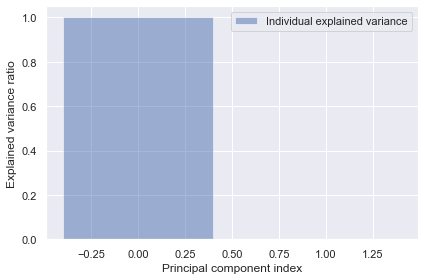

In [35]:
total_egnvalues = sum(eig_v)
var_exp = [(i/total_egnvalues) for i in sorted(eig_v, reverse=True)]

#Plot the importance of variables
cum_sum_exp = np.cumsum(var_exp)
plt.bar(range(0,len(var_exp)), var_exp, alpha=0.5, align='center', label='Individual explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

# Part 02 question 03

Defining the dataset

In [38]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [39]:
sentence_1="Human machine interface for ABC computer applications"
sentence_2="A survey of user opinion of computer system response time"
sentence_3="The EPS user interface management system"
sentence_4="System and human system engineering testing of EPS"
sentence_5="Relation of user perceived response time to error measurement"
sentence_6="The generation of random, binary, ordered trees"
sentence_7="The intersection graph of paths in trees"
sentence_8="Graph minors IV: Widths of trees and well-quasi-ordering"
sentence_9="Graph minors: A survey"

<b> a. Generate a data matrix (bag of words) wherein each column represents a unique
word in the corpus and each row denotes one document in Python. </b>

In [118]:
 
CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english')
#transform
Count_data = CountVec.fit_transform([sentence_1,sentence_2,sentence_3,sentence_4,sentence_5,sentence_6,sentence_7,sentence_8,sentence_9])
 
#create dataframe
A=np.array(Count_data.toarray())
print(A)

[[1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]]


In [41]:
A.shape

(9, 32)

<b> b. By following all the necessary steps, find out the principal components by using
np.linalg.eig( ). </b>

In [42]:
An=(A-A.mean(axis=0)) #zero-centre data

In [43]:
An.shape

(9, 32)

In [44]:
An

array([[ 0.88888889,  0.88888889, -0.11111111,  0.77777778, -0.11111111,
        -0.22222222, -0.11111111, -0.11111111, -0.33333333,  0.77777778,
         0.77777778, -0.11111111, -0.11111111,  0.88888889, -0.11111111,
        -0.11111111, -0.22222222, -0.11111111, -0.11111111, -0.11111111,
        -0.11111111, -0.11111111, -0.11111111, -0.11111111, -0.11111111,
        -0.22222222, -0.22222222, -0.11111111, -0.22222222, -0.33333333,
        -0.33333333, -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111,  0.77777778, -0.11111111,
        -0.22222222, -0.11111111, -0.11111111, -0.33333333, -0.22222222,
        -0.22222222, -0.11111111, -0.11111111, -0.11111111, -0.11111111,
        -0.11111111, -0.22222222,  0.88888889, -0.11111111, -0.11111111,
        -0.11111111, -0.11111111, -0.11111111, -0.11111111, -0.11111111,
         0.77777778,  0.77777778, -0.11111111,  0.77777778, -0.33333333,
         0.66666667, -0.11111111],
       [-0.11111111, -0.11111111, -0.11111111, -0.2222

In [45]:
#calculating covarience using numpy built-in function for cross-checking
np.cov(A,rowvar=False,)  

array([[ 0.11111111,  0.11111111, -0.01388889, ..., -0.04166667,
        -0.04166667, -0.01388889],
       [ 0.11111111,  0.11111111, -0.01388889, ..., -0.04166667,
        -0.04166667, -0.01388889],
       [-0.01388889, -0.01388889,  0.11111111, ...,  0.08333333,
        -0.04166667, -0.01388889],
       ...,
       [-0.04166667, -0.04166667,  0.08333333, ...,  0.25      ,
        -0.125     ,  0.08333333],
       [-0.04166667, -0.04166667, -0.04166667, ..., -0.125     ,
         0.25      , -0.04166667],
       [-0.01388889, -0.01388889, -0.01388889, ...,  0.08333333,
        -0.04166667,  0.11111111]])

In [46]:
# calculating covarience 
C=np.dot(An.T,An)/8 
C

array([[ 0.11111111,  0.11111111, -0.01388889, ..., -0.04166667,
        -0.04166667, -0.01388889],
       [ 0.11111111,  0.11111111, -0.01388889, ..., -0.04166667,
        -0.04166667, -0.01388889],
       [-0.01388889, -0.01388889,  0.11111111, ...,  0.08333333,
        -0.04166667, -0.01388889],
       ...,
       [-0.04166667, -0.04166667,  0.08333333, ...,  0.25      ,
        -0.125     ,  0.08333333],
       [-0.04166667, -0.04166667, -0.04166667, ..., -0.125     ,
         0.25      , -0.04166667],
       [-0.01388889, -0.01388889, -0.01388889, ...,  0.08333333,
        -0.04166667,  0.11111111]])

In [47]:
# Computing eigen values and eigen vectors
eigen_val,eigen_vec=np.linalg.eig(C)
eigen_val

array([ 1.18576115e+00+0.00000000e+00j,  9.01824531e-01+0.00000000e+00j,
        6.30492789e-01+0.00000000e+00j,  5.31836281e-01+0.00000000e+00j,
        2.27415818e-01+0.00000000e+00j,  4.35190397e-01+0.00000000e+00j,
        3.70429584e-01+0.00000000e+00j,  3.55938338e-01+0.00000000e+00j,
        9.57198616e-17+0.00000000e+00j, -6.51699071e-17+0.00000000e+00j,
       -5.77873652e-17+0.00000000e+00j, -4.97016528e-18+4.26420090e-17j,
       -4.97016528e-18-4.26420090e-17j, -3.09914042e-17+0.00000000e+00j,
       -1.38709756e-17+2.26597292e-17j, -1.38709756e-17-2.26597292e-17j,
        2.46872900e-17+1.12426932e-17j,  2.46872900e-17-1.12426932e-17j,
        2.69028166e-17+0.00000000e+00j,  2.11181713e-17+0.00000000e+00j,
       -1.66401299e-17+0.00000000e+00j, -1.19948748e-17+0.00000000e+00j,
        7.08463500e-18+4.26620438e-18j,  7.08463500e-18-4.26620438e-18j,
       -5.53799966e-19+5.63424243e-18j, -5.53799966e-19-5.63424243e-18j,
        2.86132936e-18+0.00000000e+00j, -1.63383323

In [48]:
eigen_vec

array([[ 4.21894337e-02+0.j, -2.35900432e-01+0.j,  1.27036714e-01+0.j,
        ..., -1.41894403e-03+0.j, -5.71117077e-04+0.j,
         2.02041692e-16+0.j],
       [ 4.21894337e-02+0.j, -2.35900432e-01+0.j,  1.27036714e-01+0.j,
        ..., -1.86007513e-02+0.j, -6.80500355e-03+0.j,
         1.43864917e-15+0.j],
       [-7.53800161e-02+0.j,  4.33119485e-04+0.j, -3.51096947e-01+0.j,
        ...,  1.22670362e-02+0.j,  2.69692752e-03+0.j,
        -5.96080106e-16+0.j],
       ...,
       [-3.56983499e-01+0.j,  1.50020015e-01+0.j, -2.18970028e-01+0.j,
        ..., -4.65235815e-02+0.j, -6.97369839e-03+0.j,
         9.20036805e-16+0.j],
       [ 3.65649211e-01+0.j,  1.83166057e-01+0.j,  1.38680984e-02+0.j,
        ...,  1.68794433e-02+0.j,  1.05995682e-03+0.j,
        -1.64240866e-17+0.j],
       [-1.80955093e-01+0.j,  1.11445339e-01+0.j,  1.69406523e-01+0.j,
        ..., -2.48870988e-02+0.j, -9.93730417e-03+0.j,
         1.08862066e-15+0.j]])

In [13]:
# Transforming the data on to PC
Q=eigen_vec
Y=np.dot(An,Q)
Y.shape, Q.shape, An.shape

((9, 32), (32, 32), (9, 32))

In [14]:
# reconstructing the orignal data
A_recon=np.dot(Y,Q.T)
A_recon+A.mean(axis=0)

array([[ 1.00000000e+00-5.05994128e-33j,  1.00000000e+00+1.36115450e-32j,
         6.24500451e-16+5.01271091e-33j,  1.00000000e+00-1.62117468e-33j,
        -2.22044605e-16-6.76007256e-33j,  4.16333634e-16-7.47742193e-33j,
        -5.13478149e-16+3.56578711e-33j,  1.94289029e-16+2.21427123e-33j,
        -8.88178420e-16-8.38838818e-34j,  1.00000000e+00-1.42092172e-33j,
         1.00000000e+00-1.86828380e-33j,  4.16333634e-16+8.91754235e-33j,
        -1.24900090e-16-3.55492025e-33j,  1.00000000e+00-4.03512777e-33j,
        -1.01307851e-15+2.18499940e-33j, -3.33066907e-16+2.80511649e-33j,
         1.05471187e-15-1.36589305e-32j,  1.80411242e-16+5.68931482e-33j,
         4.16333634e-17-4.92613369e-33j,  3.05311332e-16+4.74930589e-33j,
         1.52655666e-16+6.28900049e-33j,  2.77555756e-17-2.79407835e-34j,
         0.00000000e+00+4.21934759e-34j,  1.24900090e-16-7.08788912e-33j,
        -6.93889390e-17-4.06742099e-33j,  2.77555756e-17+2.06206209e-33j,
        -1.11022302e-16+5.39387640e-33

In [18]:
np.round(A_recon,2) #just for cross-checking with the orignal 

array([[ 0.89-0.j,  0.89+0.j, -0.11+0.j,  0.78-0.j, -0.11-0.j, -0.22-0.j,
        -0.11+0.j, -0.11+0.j, -0.33-0.j,  0.78-0.j,  0.78-0.j, -0.11+0.j,
        -0.11-0.j,  0.89-0.j, -0.11+0.j, -0.11+0.j, -0.22-0.j, -0.11+0.j,
        -0.11-0.j, -0.11+0.j, -0.11+0.j, -0.11-0.j, -0.11+0.j, -0.11-0.j,
        -0.11-0.j, -0.22+0.j, -0.22+0.j, -0.11+0.j, -0.22+0.j, -0.33+0.j,
        -0.33-0.j, -0.11+0.j],
       [-0.11-0.j, -0.11+0.j, -0.11-0.j,  0.78+0.j, -0.11-0.j, -0.22+0.j,
        -0.11-0.j, -0.11-0.j, -0.33+0.j, -0.22+0.j, -0.22+0.j, -0.11+0.j,
        -0.11+0.j, -0.11+0.j, -0.11+0.j, -0.11+0.j, -0.22+0.j,  0.89-0.j,
        -0.11-0.j, -0.11+0.j, -0.11+0.j, -0.11-0.j, -0.11+0.j, -0.11-0.j,
        -0.11+0.j,  0.78+0.j,  0.78-0.j, -0.11-0.j,  0.78-0.j, -0.33+0.j,
         0.67-0.j, -0.11+0.j],
       [-0.11-0.j, -0.11+0.j, -0.11-0.j, -0.22-0.j, -0.11+0.j,  0.78+0.j,
        -0.11-0.j, -0.11-0.j, -0.33+0.j, -0.22-0.j,  0.78+0.j, -0.11+0.j,
        -0.11+0.j, -0.11+0.j,  0.89+0.j, -0.11-0.j

<b> c. Draw scree plot and choose principal components such that 92% variance is
retained. </b>

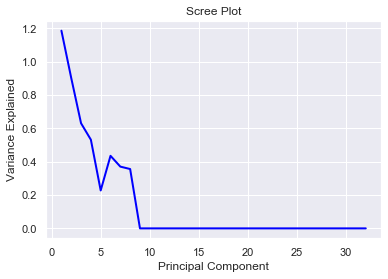

In [82]:
PC_values = np.arange(len(eigen_val)) + 1
#PC_values = abs(PC_values)
plt.plot(PC_values, eigen_val, linewidth=2, color='blue')
plt.title('Scree Plot')
plt.xlabel('Principal Component')
plt.ylabel('Variance Explained')
plt.show()

By looking at the scree plot first 2 principal components cover 92% varience. So for choosing first 2 principal components we can get the 2 highest values from all of the eigen values. Then eigen vectors corresponding to these maximum values will become our 1st and 2nd Principal components.

In [76]:
abs_eigen_val = abs(eigen_val)
#print(max(abs_eigen_val))
#Sort the array in decending order    
for i in range(0, len(abs_eigen_val)):    
    for j in range(i+1, len(abs_eigen_val)):    
        if(abs_eigen_val[i] < abs_eigen_val[j]):    
            temp = abs_eigen_val[i];    
            abs_eigen_val[i] = abs_eigen_val[j];    
            abs_eigen_val[j] = temp;    
     
print();    
     
#Displaying elements of the array after sorting    
    
print("Elements of array sorted in ascending order: ");    
for i in range(0, len(abs_eigen_val)):    
    print(abs_eigen_val[i], end=" ");    


Elements of array sorted in ascending order: 
1.1857611498188194 0.9018245310886152 0.6304927893880804 0.5318362810308552 0.4351903974757957 0.3704295844436469 0.35593833753630294 0.22741581810677364 9.571986163900319e-17 6.516990709270653e-17 5.778736520553559e-17 4.2930682229557055e-17 4.2930682229557055e-17 3.0991404173112066e-17 2.7126747663606787e-17 2.7126747663606787e-17 2.6902816637553128e-17 2.6568163139142622e-17 2.6568163139142622e-17 2.1118171269447817e-17 1.6640129896237864e-17 1.1994874757468245e-17 8.269979009299673e-18 8.269979009299673e-18 5.6613940119132045e-18 5.6613940119132045e-18 2.8613293614499316e-18 1.633833233145674e-18 2.16757055903564e-19 1.013521348850269e-19 3.973827652878065e-21 2.1274644808420795e-33 

The selected eigen values are 1.1857611498188194 and 0.9018245310886152. In orignal eigen value vector these are on the index of 0 and 1. Hence selecting 1st PC and 2 PC from index 0 and 1 of eigen vectors matrix.

In [96]:
selected_eig_vec = eigen_vec[:,[0,1]]
#print(selected_eig_vec)
selected_eig_vec.shape

(32, 2)

<b> d. Project the zero centered data matrix onto the principal components to get
transformed data Y. </b>

In [100]:
# Transforming the data on to PC
R=selected_eig_vec
Yn=np.dot(An,R)
Yn.shape, R.shape, An.shape
print(Yn)

[[ 0.40021273+0.j -1.70192637+0.j]
 [ 1.33622717+0.j  0.64593737+0.j]
 [ 0.52467233+0.j -0.59324785+0.j]
 [ 0.07079194+0.j -1.04755399+0.j]
 [ 1.60768153+0.j  1.26877962+0.j]
 [-0.71506156+0.j  0.00312478+0.j]
 [-0.95475961+0.j  0.27517593+0.j]
 [-1.71655615+0.j  0.80403313+0.j]
 [-0.55320838+0.j  0.34567739+0.j]]


<b> e. Now reconstruct the original data matrix by reversing the process. </b>

In [109]:
# reconstructing the orignal data
A_recons = np.dot(Yn,R.T)
A_rec = A_recons+A.mean(axis=0)
A_rec = abs(np.round(A_rec,2))
#print(A_rec)
A_rec.shape

(9, 32)

<b> f. Calculate the reconstruction loss. </b>

In [115]:
rec_loss = (A - A_rec)**2
#print(rec_loss)
rec_loss.shape

(9, 32)

<b> g. Now you are asked to transform a test data point [[3,3,3,0,0]] by projecting it onto
the new axis obtained through PCA. </b>

In [116]:
# Transforming the data on to PC
test_data_point=[3,3,3,0,0]
R=selected_eig_vec
Yt=np.dot(test_data_point,R)
Yt.shape, R.shape, An.shape
print(Yt)

ValueError: shapes (5,) and (32,2) not aligned: 5 (dim 0) != 32 (dim 0)

# Part 02 question 4
<b> Solve “part a to f” question 3 by using np.linalg.svd( ) and compare the results. Can we
transform the test data point, given in part g, using the svd method? If yes, then solve
part g and h of question 3. If no, then explain the reason behind it.</b>

In [119]:
import pandas as pd
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer

In [120]:
sentence_1="Human machine interface for ABC computer applications"
sentence_2="A survey of user opinion of computer system response time"
sentence_3="The EPS user interface management system"
sentence_4="System and human system engineering testing of EPS"
sentence_5="Relation of user perceived response time to error measurement"
sentence_6="The generation of random, binary, ordered trees"
sentence_7="The intersection graph of paths in trees"
sentence_8="Graph minors IV: Widths of trees and well-quasi-ordering"
sentence_9="Graph minors: A survey"

CountVec = CountVectorizer(ngram_range=(1,1), # to use bigrams ngram_range=(2,2)
                           stop_words='english')
#transform
Count_data = CountVec.fit_transform([sentence_1,sentence_2,sentence_3,sentence_4,sentence_5,sentence_6,sentence_7,sentence_8,sentence_9])
 
#create dataframe
A=np.array(Count_data.toarray())
print(A)

[[1 1 0 1 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0]
 [0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 1 0 1 0 1 0]
 [0 0 0 0 0 1 0 0 0 0 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0]
 [0 0 0 0 1 1 0 0 0 1 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0]
 [0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 1 1 0 0 1 0 1 0]
 [0 0 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 0 1 0 0 0 0 1 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0]
 [0 0 0 0 0 0 0 0 1 0 0 0 1 0 0 0 1 0 0 1 0 0 1 0 0 0 0 0 0 1 0 1]
 [0 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 0 0 0 0]]


In [129]:
U,sigma,V=np.linalg.svd(A,full_matrices=False,)
print(U.shape, sigma.shape, V.shape)
print("U:",U)
print("Sigma:",sigma)
print("V already transposed:",V.T)

(9, 9) (9,) (9, 32)
U: [[-0.22784912  0.0588541   0.79627815 -0.01583129  0.38054292 -0.39631442
  -0.034907   -0.01396587  0.08378473]
 [-0.62215094  0.09790739 -0.0612189  -0.10747606  0.38581272  0.53829917
   0.05511328  0.12576766 -0.36134618]
 [-0.25670294  0.06627912  0.27397511  0.06596013 -0.47931635  0.2630337
   0.23261217 -0.70215714  0.06506623]
 [-0.0781514   0.0240701   0.38847023  0.05993812 -0.60550598  0.22551754
  -0.17945433  0.62044085 -0.06453632]
 [-0.6634507   0.16373369 -0.36871551  0.11853454 -0.23903835 -0.52295504
  -0.09702119  0.07819866  0.19202458]
 [-0.04328833 -0.28471711  0.00790819  0.89795722  0.15530558  0.11900994
   0.20961608  0.09717266  0.13786935]
 [-0.07703962 -0.41379117  0.00532842  0.11401176  0.00118436  0.03387755
  -0.83387842 -0.27981224 -0.18712963]
 [-0.14806712 -0.78165059  0.00855082 -0.26096852 -0.13115565 -0.2232223
   0.39332792  0.07048131 -0.26873097]
 [-0.13823627 -0.30315791 -0.01032979 -0.28066722  0.10719891  0.30741304
 

In [131]:
sigma_dia=np.zeros((9,32))
np.fill_diagonal(sigma_dia,sigma)
print(np.round(sigma_dia,3))

[[3.194 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    3.033 0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    2.599 0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    2.199 0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    2.04  0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.    0.
  0.    0.    0.    0.    0.    0.    0.    0.   ]
 [0.    0.    0.    0.    0.    1.8

In [133]:
#reconstruction by using first 9 components because first 9 diagonals are non-zero, rest are zero
U_2=U[:,0:9]
sigma_r=sigma_dia[0:9,0:9] 
V_2=V[0:9,:]
np.round(np.dot(U_2,np.dot(sigma_r,V_2)),9) # able to reconstruct original data without any error when considered only non-zero columns

array([[ 1.,  1., -0.,  1., -0., -0.,  0., -0., -0.,  1.,  1., -0.,  0.,
         1., -0.,  0.,  0., -0., -0.,  0., -0.,  0.,  0., -0.,  0.,  0.,
        -0., -0.,  0.,  0., -0.,  0.],
       [-0.,  0.,  0.,  1.,  0.,  0.,  0.,  0.,  0.,  0.,  0., -0.,  0.,
        -0.,  0.,  0.,  0.,  1.,  0.,  0., -0.,  0.,  0.,  0.,  0.,  1.,
         1.,  0.,  1., -0.,  1.,  0.],
       [-0., -0., -0.,  0.,  0.,  1., -0., -0.,  0., -0.,  1.,  0.,  0.,
        -0.,  1., -0.,  0.,  0., -0.,  0.,  0., -0.,  0., -0., -0.,  0.,
         0.,  0.,  0.,  0.,  1.,  0.],
       [-0., -0.,  0.,  0.,  1.,  1., -0.,  0.,  0.,  1., -0.,  0., -0.,
        -0.,  0., -0.,  0.,  0.,  0., -0.,  0., -0., -0.,  0., -0.,  0.,
         0.,  1.,  0.,  0.,  0., -0.],
       [-0., -0., -0.,  0., -0., -0.,  1., -0.,  0., -0., -0.,  0.,  0.,
        -0.,  0.,  1.,  0.,  0., -0.,  0.,  0.,  1.,  0., -0.,  1.,  1.,
         0., -0.,  1.,  0.,  1.,  0.],
       [ 0.,  0.,  1.,  0., -0., -0.,  0.,  1., -0.,  0.,  0.,  0.,  0.,
  

# Part 02 question 05
Consider the martix A =[[1,3,6],[2,1,4],[1,0,3]] <br>
<b> a. Find the principal components, after standardizing A </b>

In [22]:
A=np.array([[1,3,6],[2,1,4],[1,0,3]])
As=(A-A.mean(axis=0))/A.std(axis=0)
C=np.dot(As,As.T)
print("C=",C)
eig_v,eig_vec=np.linalg.eig(C)
eig_v, eig_vec

C= [[ 4.07142857 -1.71428571 -2.35714286]
 [-1.71428571  2.14285714 -0.42857143]
 [-2.35714286 -0.42857143  2.78571429]]


(array([6.20084013e+00, 1.66533454e-16, 2.79915987e+00]),
 array([[-0.8051731 ,  0.57735027,  0.13550992],
        [ 0.28523152,  0.57735027, -0.76505532],
        [ 0.51994159,  0.57735027,  0.6295454 ]]))

<b> b. Find the principal components, after subtracting the mean from A </b>

In [25]:
A=np.array([[1,3,6],[2,1,4],[1,0,3]])
As=(A-A.mean(axis=0))
C=np.dot(As,As.T)
print("C=",C)
eig_v,eig_vec=np.linalg.eig(C)
eig_v, eig_vec

C= [[ 5.66666667 -1.33333333 -4.33333333]
 [-1.33333333  0.66666667  0.66666667]
 [-4.33333333  0.66666667  3.66666667]]


(array([9.35889894e+00, 4.13280230e-16, 6.41101056e-01]),
 array([[-0.77523224,  0.57735027,  0.2562843 ],
        [ 0.1656674 ,  0.57735027, -0.79951296],
        [ 0.60956484,  0.57735027,  0.54322866]]))

<b> c. Compare the results, and share the insights. </b> <br><br>
Although the eigen values are different, but the sequence for the selection of Principal components remains same, i.e., <br> 1st-eigen-value > 3rd-eigen-value > 2nd-eigen-value <br>
However, <br>
a)standardizing A - 1st principal component captures 62% varience and 2nd principal component captures 27% varience. <br>
b)subtracting the mean from A -  1st principal component captures 93% varience and 2nd principal component captures 6% varience. <br>

Using only 1st principal component in (b) we can reconstruct easily but in (a) we have to use at least 1st and 2nd both principal components for recontruction. 

# Bonus Task

In [32]:
import pylab as pl

from sklearn import datasets
from sklearn.decomposition import PCA

In [33]:
iris = datasets.load_iris()

X = iris.data
y = iris.target
target_names = iris.target_names


### PCA with 2 principal components

In [34]:
pca = PCA(n_components=2)
X_r = pca.fit(X).transform(X)

In [64]:
# Percentage of variance explained for each components
print(
    "explained variance ratio (first two components): %s"
    % str(pca.explained_variance_ratio_)
)



explained variance ratio (first two components): [0.92461872 0.05306648]


In [65]:
def plot3clusters(X, title, vtitle):
  plt.figure()
  colors = ['navy', 'turquoise', 'darkorange']
  lw = 2

  for color, i, target_name in zip(colors, [0, 1, 2], target_names):
      plt.scatter(X[y == i, 0], X[y == i, 1], color=color, alpha=1., lw=lw,
                  label=target_name)
  plt.legend(loc='best', shadow=False, scatterpoints=1)
  plt.title(title)  
  plt.xlabel(vtitle + "1")
  plt.ylabel(vtitle + "2")
  plt.show()

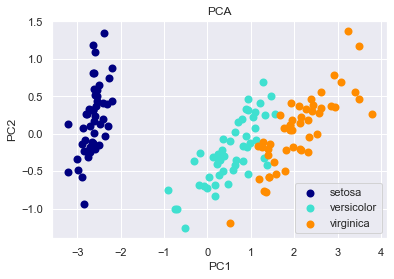

In [68]:
plot3clusters(X_r[:,:2], 'PCA', 'PC')  

### Linear Auto Encoder

In [45]:

from tensorflow.keras.models import Model, load_model
from tensorflow.keras.layers import Input, Dense
from tensorflow.keras.callbacks import ModelCheckpoint

In [72]:
input_size = 4
hidden_size = 2


input_img = Input(shape=(input_size,))
hidden_1 = Dense(hidden_size, activation='linear')(input_img)
output_img = Dense(input_size, activation='linear')(hidden_1)

autoencoder = Model(input_img, output_img)
autoencoder.compile(optimizer='adam', loss='mse')
print(autoencoder.summary())
history=autoencoder.fit(X, X, epochs=100, shuffle=True,validation_split=0.1)

Model: "model_12"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None
Train on 135 samples, validate on 15 samples
Epoch 1/100
135/135 [==============================] - 1s 4ms/sample - loss: 14.4704 - val_loss: 20.6343
Epoch 2/100
135/135 [==============================] - 0s 170us/sample - loss: 13.9800 - val_loss: 20.0057
Epoch 3/100
135/135 [==============================] - 0s 200us/sample - loss: 13.5161 - val_loss: 19.4067
Epoch 4/100
135/135 [==

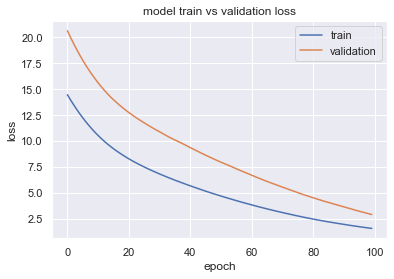

In [73]:
#plot our loss 
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


In [74]:
reconstructed = autoencoder.predict(X)

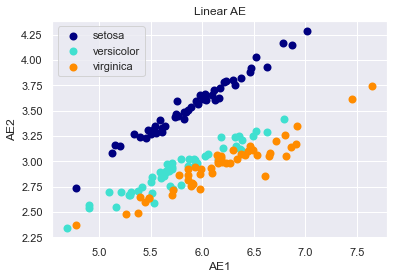

In [75]:
plot3clusters(reconstructed[:,:2], 'Linear AE', 'AE')  

In [83]:
print(autoencoder.layers[1].get_weights()[1])

[0.09467077 0.03580555]


In [84]:
autoencoder.get_weights()

[array([[ 0.2952147 , -0.9404026 ],
        [ 1.0238974 , -0.24293329],
        [-0.19882023, -0.11443227],
        [-0.35858548,  0.04426283]], dtype=float32),
 array([0.09467077, 0.03580555], dtype=float32),
 array([[ 0.52319115,  0.5576858 ,  0.04975379, -0.82215935],
        [-0.5873937 , -0.12176782, -0.19608827, -0.68189144]],
       dtype=float32),
 array([ 0.11529247,  0.23609747,  0.39583293, -0.12399621], dtype=float32)]

### Non-linear Autoencoder

In [85]:
#Non-linear Auto Encoder
input_img2 = Input(shape=(input_size,))
hidden_12 = Dense(hidden_size, activation='relu')(input_img)
output_img2 = Dense(input_size, activation='sigmoid')(hidden_1)

autoencoder2 = Model(input_img, output_img)
autoencoder2.compile(optimizer='adam', loss='mse')
print(autoencoder2.summary())
history2=autoencoder2.fit(X, X, epochs=100, shuffle=True,validation_split=0.1)

Model: "model_13"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_13 (InputLayer)        [(None, 4)]               0         
_________________________________________________________________
dense_24 (Dense)             (None, 2)                 10        
_________________________________________________________________
dense_25 (Dense)             (None, 4)                 12        
Total params: 22
Trainable params: 22
Non-trainable params: 0
_________________________________________________________________
None
Train on 135 samples, validate on 15 samples
Epoch 1/100
135/135 [==============================] - 0s 3ms/sample - loss: 1.5443 - val_loss: 2.7950
Epoch 2/100
135/135 [==============================] - 0s 244us/sample - loss: 1.4747 - val_loss: 2.6644
Epoch 3/100
135/135 [==============================] - 0s 214us/sample - loss: 1.4112 - val_loss: 2.5409
Epoch 4/100
135/135 [========

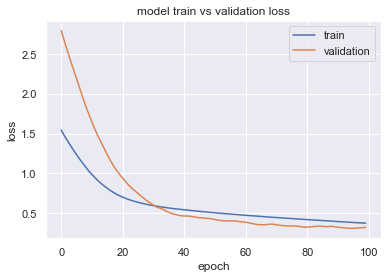

In [87]:
#plot our loss 
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model train vs validation loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper right')
plt.show()


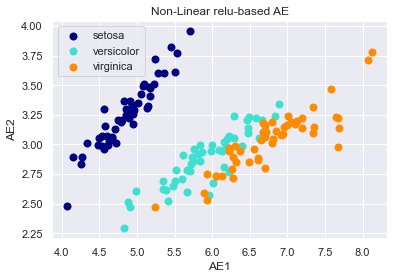

In [88]:
reconstructed2 = autoencoder2.predict(X)
plot3clusters(reconstructed2[:,:2], 'Non-Linear relu-based AE', 'AE')

In [89]:
autoencoder2.get_weights()

[array([[ 0.38791904, -1.059211  ],
        [ 0.85073036, -0.12601116],
        [ 0.02974404, -0.4365695 ],
        [-0.13836457, -0.3070362 ]], dtype=float32),
 array([0.04183929, 0.05175896], dtype=float32),
 array([[ 0.374049  ,  0.71311605,  0.04213218, -0.66960245],
        [-0.4749001 ,  0.07608408, -0.3605084 , -0.5306856 ]],
       dtype=float32),
 array([-0.01236913,  0.24802071,  0.4334086 , -0.10031227], dtype=float32)]